In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-dataset/Housing - Housing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/housing-price-dataset/Housing - Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: ylabel='price'>

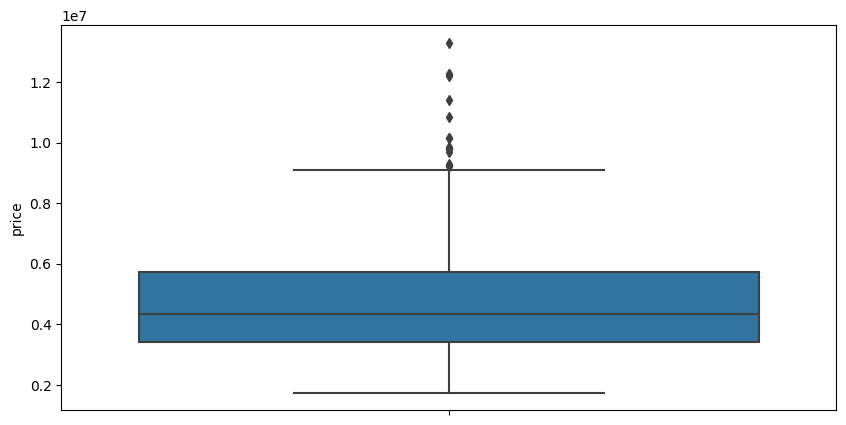

In [6]:
sns.boxplot( y=df["price"] )

In [7]:
mean= df.price.mean()
mean 

4766729.247706422

In [8]:
std_deviation = df.price.std()
std_deviation

1870439.6156573922

In [9]:
mean+3*std_deviation

10378048.0946786

In [10]:
df[df.price > 10378048.0946786 ]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [11]:
df[df.price < 10378048.0946786 ]
df.price.head(5)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

<Axes: ylabel='price'>

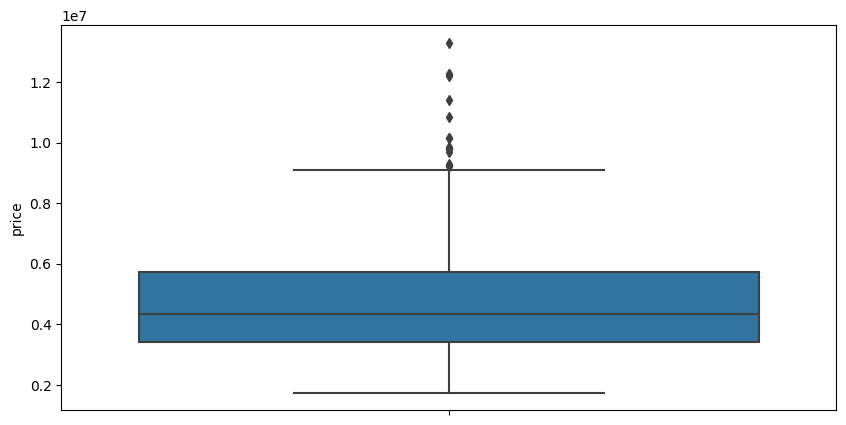

In [12]:
sns.boxplot( y=df["price"] )

# we have still outlier after 3rd Standered Davia=etion 

In [13]:
mean=df.price.mean()
mean

4766729.247706422

In [14]:
mean+ 2*std_deviation

8507608.479021206

In [15]:
df[df.price > 8426579.491055043]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [16]:
rows_drop = df[df['price'] > 8426579.491055043]

# Drop the filtered rows
df.drop(rows_drop.index, inplace=True)

In [17]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished


<Axes: ylabel='price'>

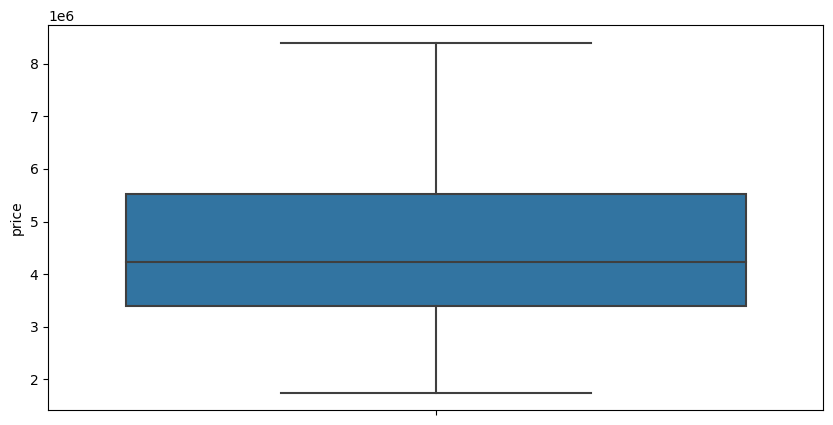

In [18]:
sns.boxplot( y=df["price"] )

# Their is No outlier in price After 2-Standered Daviention 

In [19]:
df.area.describe()

count      518.000000
mean      5029.073359
std       2076.780516
min       1650.000000
25%       3520.000000
50%       4500.000000
75%       6182.500000
max      15600.000000
Name: area, dtype: float64

<Axes: ylabel='area'>

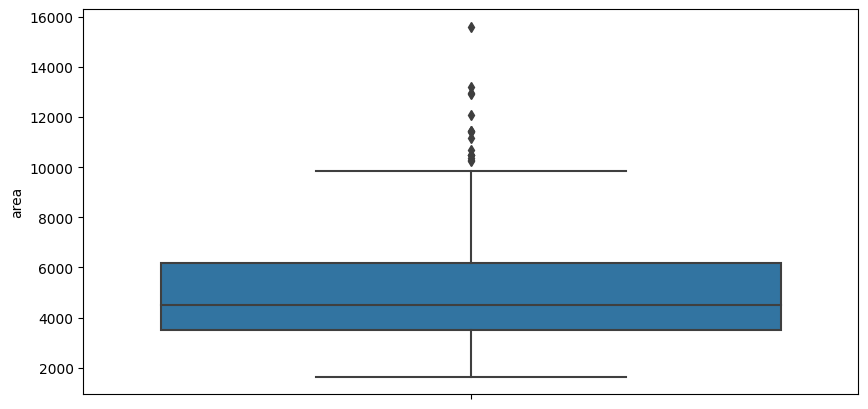

In [20]:
sns.boxplot( y=df["area"] )

In [21]:
mean= df.area.mean()
mean

5029.073359073359

In [22]:
std_area = df.area.std()
std_area

2076.780515578982

In [23]:
mean + 2*std_area

9182.634390231324

In [24]:
df[df.area > 9490.823329421277 ]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
113,6083000,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished


In [25]:
rows_to_drop = df[df['area'] > 9490.823329421277]

# Drop the filtered rows
df.drop(rows_to_drop.index, inplace=True)

In [26]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [27]:
df.shape

(497, 13)

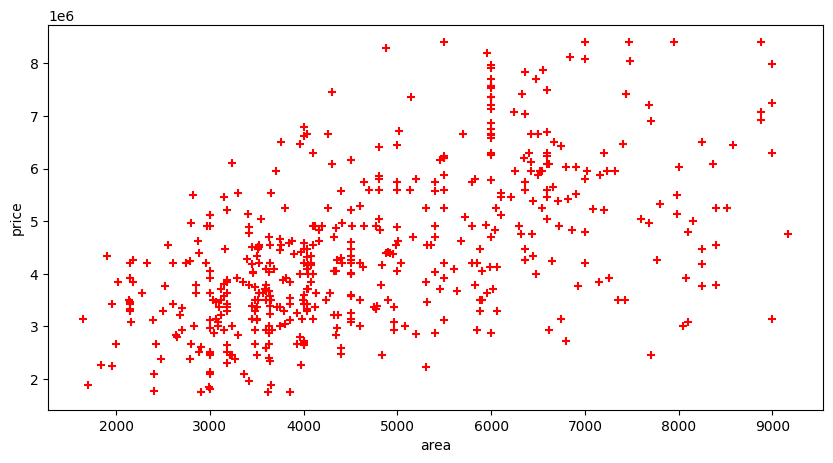

In [28]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [29]:
df['price_mln'] = df['price'].apply(lambda x: x / 1000000)

In [30]:
df['area_sqrf'] = df['area'].apply(lambda x: x / 1000)

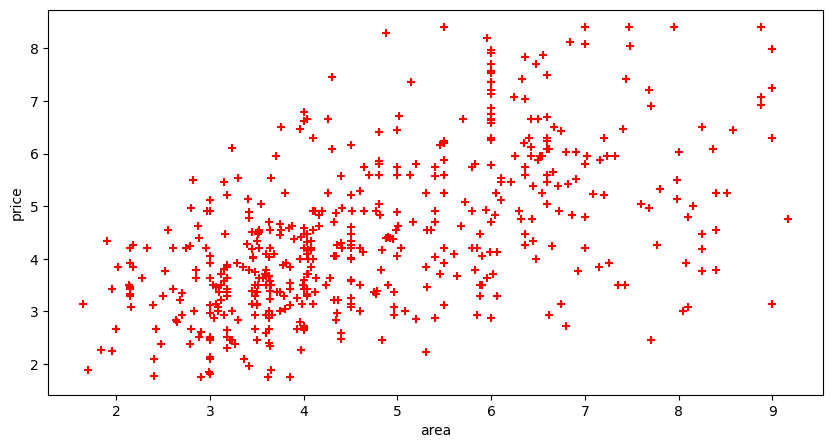

In [31]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area_sqrf,df.price_mln,color='red',marker='+')

In [32]:
from sklearn import linear_model

In [33]:
reg = linear_model.LinearRegression()
reg.fit(df[['area_sqrf','bedrooms','bathrooms','stories','parking']] ,df.price_mln)

LinearRegression()

# Home Price Prediction on bases [[area_squre_feet,Bedrooms,Bathrooms,Stories,Parkings]]

In [34]:
# Home Price Prediction on bases [[area_squre_feet,Bedrooms,Bathrooms,Stories,Parkings]]
reeg =reg.predict([[5,2,2,2,1]])
print('Home Price Prediction',reeg,'millions')

Home Price Prediction [5.2378037] millions


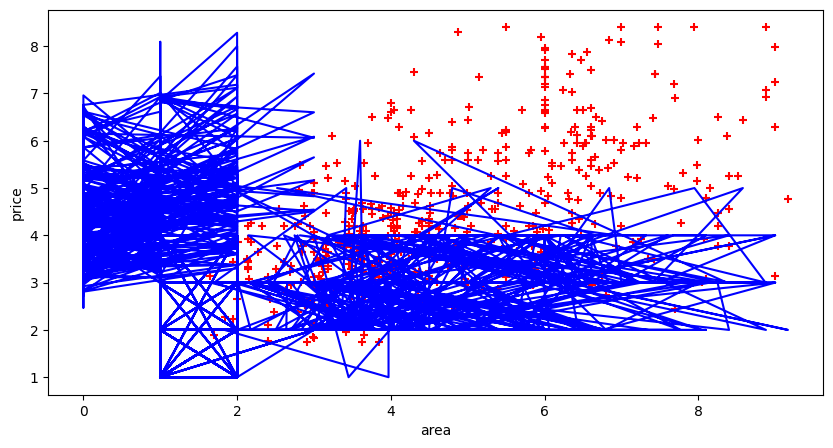

In [35]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area_sqrf,df.price_mln,color='red',marker='+')
plt.plot(df.area_sqrf,df.bedrooms,df.bathrooms,df.stories,df.parking,reg.predict(df[['area_sqrf','bedrooms','bathrooms','stories','parking']]),color = 'blue')

In [36]:
# Home Price Prediction on bases [[area_squre_feet,Bedrooms,Bathrooms,Stories,Parkings]]
reeg =reg.predict([[4,3,3,2,2]])
print('Home Price Prediction',reeg,'millions')

Home Price Prediction [5.98136079] millions


In [37]:
# Home Price Prediction on bases [[area_squre_feet,Bedrooms,Bathrooms,Stories,Parkings]]
reeg =reg.predict([[6,4,3,3,2]])
print('Home Price Prediction',reeg,'millions')

Home Price Prediction [7.40837023] millions
